# Basic use of scikit-learn

## Loading pre-formated data

In [1]:
# load the IRIS dataset
from sklearn.datasets import load_iris
irisData=load_iris()
# get info on the dataset
#print(irisData.data)
print(irisData.target)
print(irisData.target_names)
print(irisData.feature_names)
#print(irisData.DESCR)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**Q1:** What type of machine learning problem is that?

It's a multi-class classification problem.

**Q2:** How many features are there? What kind of features?

There are 4 features. They are all numerical.

## Plotting parts of the data

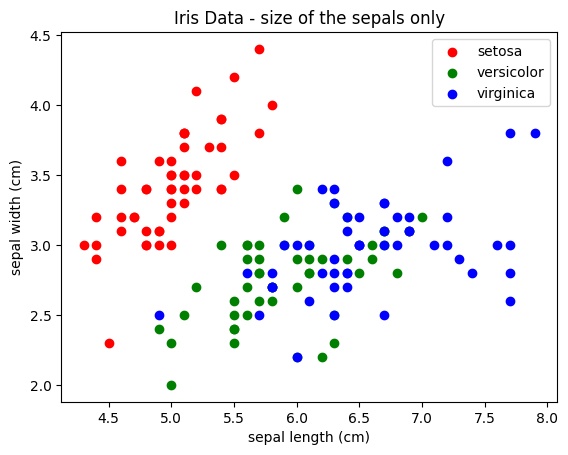

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt # replace the name "pyplot" by "plt" 
X=irisData.data
y=irisData.target
xi=0
yi=1

colors=["red","green","blue"] # associate a color to each class label
for num_label in range(3): # for each label
        plt.scatter(X[y==num_label][:, xi],X[y==num_label][:,yi],color=colors[num_label],label=irisData.target_names[num_label])
plt.legend()
plt.xlabel(irisData.feature_names[xi]) 
plt.ylabel(irisData.feature_names[yi])
plt.title("Iris Data - size of the sepals only") 
plt.show()

**Q3:** From the previous visualisation, what can you predict about the difficulty of this dataset?

Separating the blue and green classes will be hard because they are mixed.

## Classifying with kNN

In [3]:
from sklearn import neighbors
nb_neighb = 15
clf = neighbors.KNeighborsClassifier(nb_neighb) # to know more about the parameters, type help(neighbors.KNeighborsClassifier)

clf.fit(X, y) # training
print('accuracy on X is',clf.score(X,y))

# to predict on a specific example
print('class predicted is',clf.predict([[ 5.4, 3.2, 1.6, 0.4]]))
print('proba of each class is',clf.predict_proba([[ 5.4, 3.2, 1.6, 0.4]]))

y_pred = clf.predict(X)
print('misclassified training examples are:',X[y_pred!=y])

accuracy on X is 0.9866666666666667
class predicted is [0]
proba of each class is [[1. 0. 0.]]
misclassified training examples are: [[6.  2.7 5.1 1.6]
 [4.9 2.5 4.5 1.7]]


**Q4:** What kind of problem do you see with the evaluation?

The model is evaluated on the training set.

## About training and test sets

if we want a test set and a training set, we can split the data

In [4]:
X_train, y_train = X[0:100], y[0:100] # 100 examples for training
X_test, y_test = X[100:], y[100:] # rest for testing

**Q5:** Explain why it is a really bad idea to split this iris dataset as we've done.

The classes are not equally distributed in the training and test sets.

here is a much better way to split the data into training and test sets

In [5]:
from sklearn.model_selection import train_test_split 
import random # to generate random numbers

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=random.seed()) # if needed: help(train_test_split)
print('size of train / test = ',len(X_train), len(X_test))
print('nb of training data with class 0/1/2 =', len(X_train[y_train==0]) ,len(X_train[y_train==1]), len(X_train[y_train==2]))

clf=clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n',cm)


size of train / test =  105 45
nb of training data with class 0/1/2 = 32 36 37
Confusion matrix
 [[18  0  0]
 [ 0 14  0]
 [ 0  1 12]]


**Q6:** What is on the diagonal of the confusion matrix?

The number of good predictions for each class.

**Q7:** What is the real error rate (give details)?

The error rate is the number of errors divided by the total number of tests.
Here it's 3/45.

One can prefer cross-fold validation

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

nb_folds = 10
kf=KFold(n_splits=nb_folds,shuffle=True)
score=0
for training_ind,test_ind in kf.split(X):
    #print("training index: ",training_ind,"\ntest index:",test_ind,'\n') 
    X_train=X[training_ind]
    y_train=y[training_ind]
    clf.fit(X_train, y_train)
    X_test=X[test_ind]
    y_test=y[test_ind]
    y_pred = clf.predict(X_test)
    score = score + accuracy_score(y_pred,y_test)
print('average accuracy:',score/nb_folds)

average accuracy: 0.9733333333333334


or as a one-liner:

In [7]:
from sklearn.model_selection import cross_val_score
t_scores = cross_val_score(clf, X, y, cv=10)
print(t_scores.mean())

0.9733333333333334


# Decision tree

In [8]:
# we will use another dataset (a CSV file). Pandas helps us to read this type of file.

import pandas as pd

data = 'heart.csv'
df = pd.read_csv(data)


X = df.drop(columns=['target'])
y = df['target']


X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

features = X.columns
classes = ['Not heart disease','heart disease']

print (features)

df.head()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


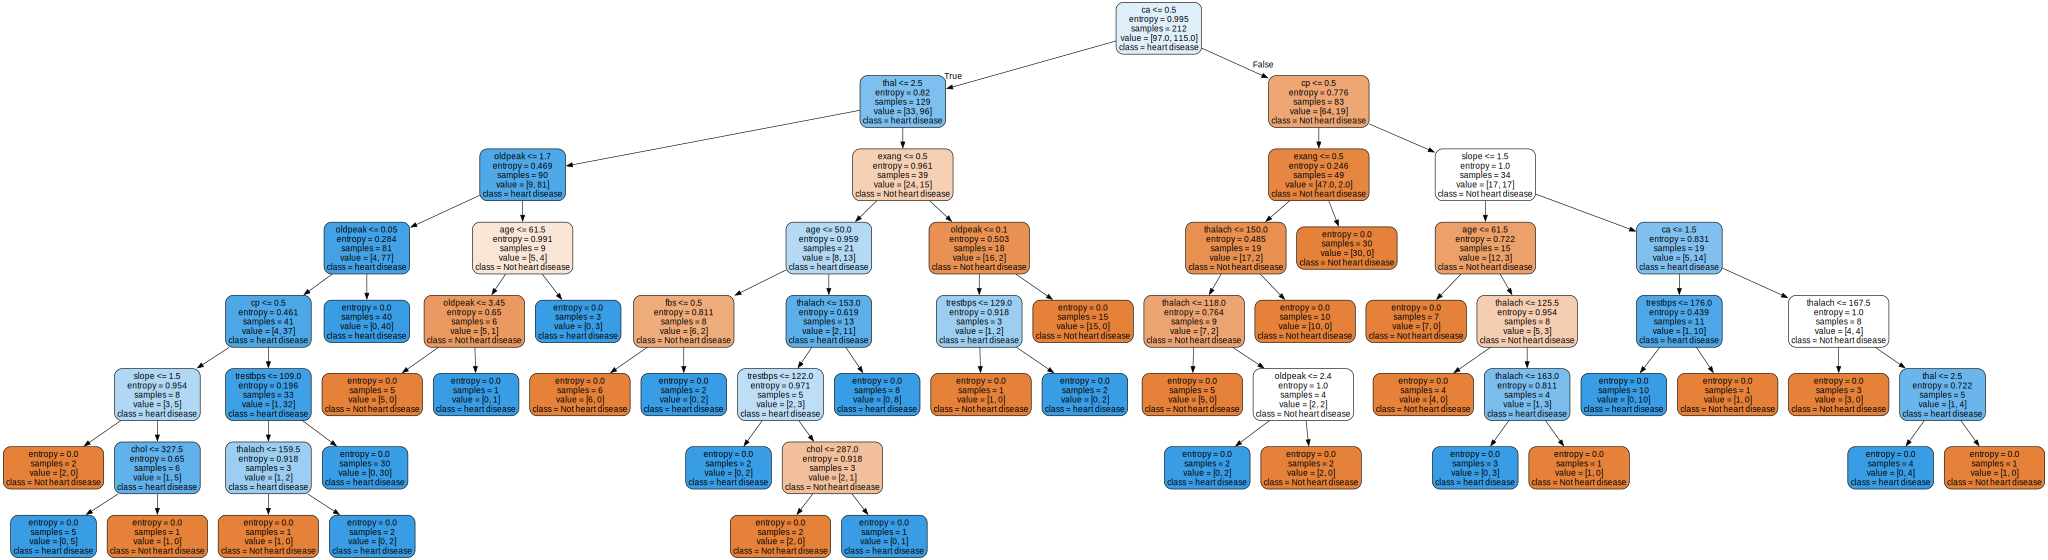

In [9]:
from sklearn import tree
from graphviz import Source

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=42)

clf = tree.DecisionTreeClassifier(max_depth=20,criterion='entropy')
clf.fit(X_train, y_train)

graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=features,
                                    class_names=classes,
                                    filled=True, rounded=True))
graph

If Graphviz is not working with your setup, look at http://people.irisa.fr/Vincent.Claveau/cours/fd/TP1.html

**Q8:** Explain each line displayed in the nodes/leaves of the tree.

The first line is the criteria used to split the classes.
The second line is the entropy of the node.
The third line is the number of samples in the node.
The fourth line is the number of samples in each class (here there are two classes).
The fifth line is the class that is predicted if the node is a leaf.
    
**Q9:** What is the name of this decision tree according to the course?

It's a binary classification tree.


Here is another nice viz of the decision tree. (The dtreeviz package is available in github. It can be installed with 'pip install dtreeviz'. It requires graphviz to be installed.)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

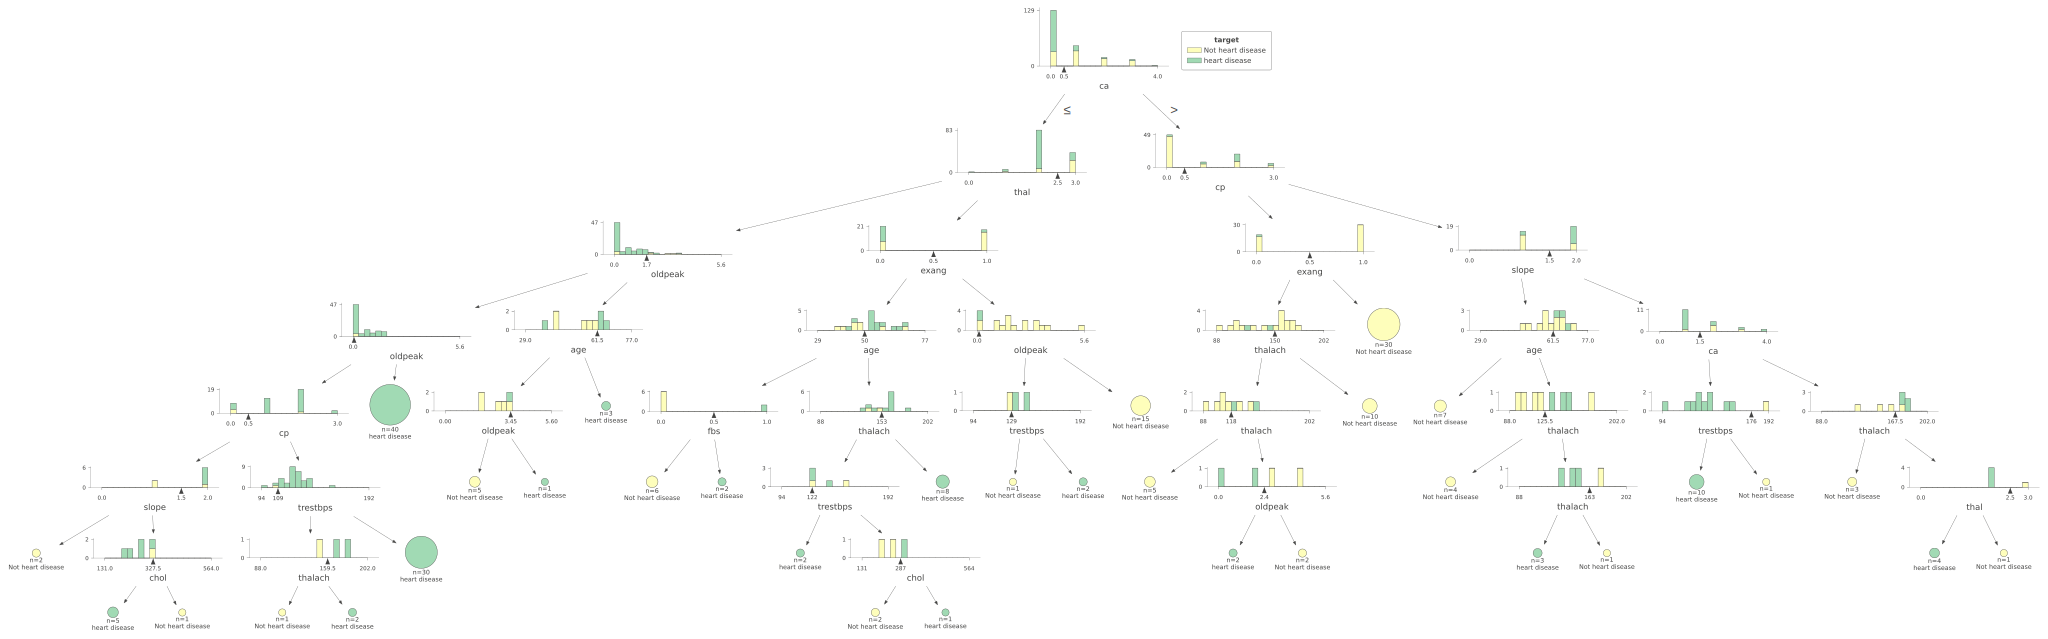

In [13]:
from dtreeviz import * # remember to load the package

graph = model(clf, X_train, y_train,
                target_name="target",
                feature_names=features,
                class_names=classes
                )

graph.view()


**Q10:** Explain what are the histograms displayed.

The histograms show the distribution of the classes in a node on the node's criteria. 
The color of the bars is the class that is predicted if the node is a leaf. 


**Q11** From the sklearn manual, explain what effectmax_depth or min_samples_split will have on the decision tree. If time permits, show the effects experimentally.

- **max_depth**: The maximum depth of the tree.
- **min_samples_split**: The minimum number of samples required to split an internal node.


### Pruning Tmax

(from https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

Here, we use a critrion called "Cost Complexity". Cost complexity pruning is all about finding the right parameter for alpha.We will get the alpha values for this tree and will check the accuracy with the pruned trees.

In [15]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.01144989 0.01299475 0.01299475 0.01421593 0.01508121
 0.01530713 0.01702661 0.01750056 0.01788634 0.01800819 0.01839686
 0.01916411 0.02095474 0.02367712 0.02849288 0.02973473 0.03477861
 0.03913504 0.04860676 0.08661577 0.12325037 0.19175318]


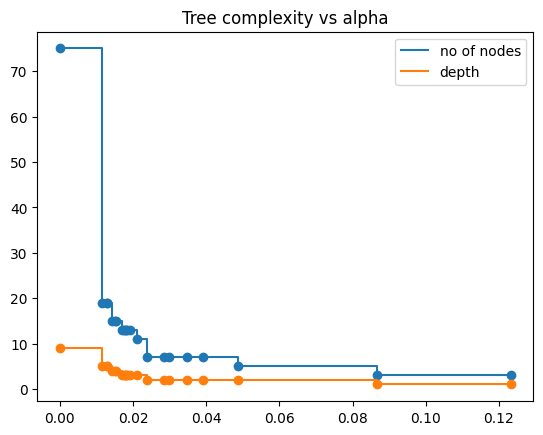

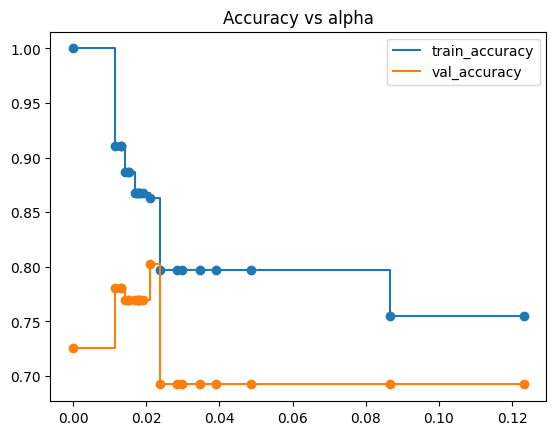

In [16]:
# For each alpha we will append our model to a list
t_clf = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    t_clf.append(clf)
    
# we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.
t_clf = t_clf[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in t_clf]
depth = [clf.tree_.max_depth for clf in t_clf]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.title('Tree complexity vs alpha')
plt.show()


# accuracy versus alpha
train_acc = []
val_acc = []
for c in t_clf:
    y_train_pred = c.predict(X_train)
    y_val_pred = c.predict(X_val)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    val_acc.append(accuracy_score(y_val_pred,y_val))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,val_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,val_acc,label='val_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

**Q12:** from the graph above, what is the best value for alpha. Replace it in the first line below .

In [19]:
best_alpha = 0.02
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=best_alpha)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_val_pred = clf_.predict(X_val)

print('Train score', accuracy_score(y_train_pred,y_train))
print(confusion_matrix(y_train_pred,y_train))

print('Validation score', accuracy_score(y_val_pred,y_val))
print(confusion_matrix(y_val_pred,y_val))

Train score 0.8632075471698113
[[ 75   7]
 [ 22 108]]
Validation score 0.8021978021978022
[[31  8]
 [10 42]]


# Bayesian learning

Scikit learn implements several variants of Bayesian learning, based on different assumptions about the data https://scikit-learn.org/stable/modules/naive_bayes.html

In [22]:
data = 'weather.nominal.csv'
df = pd.read_csv(data)

df.head()

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,0
1,sunny,hot,high,True,0
2,overcast,hot,high,False,1
3,rainy,mild,high,False,1
4,rainy,cool,normal,False,1


**Q13:** Let us consider the weather_nominal dataset. What is the type of each feature?

The features are all nominal.

In [23]:
X_train = df.drop(columns=['play'])
y_train = df['play']

features = X_train.columns
classes = ['no play','play']

# we must convert the nominal features into integers
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_train = enc.fit_transform(X_train)


In [24]:
from sklearn.naive_bayes import CategoricalNB

clf = CategoricalNB().fit(X_train,y_train)

y_train_pred = clf.predict(X_train)

print('Train score',accuracy_score(y_train_pred,y_train))
print(confusion_matrix(y_train_pred,y_train))

Train score 0.9285714285714286
[[4 0]
 [1 9]]


**Q14:** Explain what is displayed by the two following code lines and link that with what you've seen during the course. Do these figures correspond to what you get when doing it by yourself (explain)?

The first line displays the prior probabilities *(probabilités à priori)* of the classes. 
The second line displays the conditional probabilities of the features given the classes. 


In [26]:
print(clf.class_log_prior_)
print(clf.feature_log_prob_)

[-1.02961942 -0.44183275]
[array([[-2.07944154, -0.98082925, -0.69314718],
       [-0.87546874, -1.09861229, -1.38629436]]), array([[-1.38629436, -0.98082925, -0.98082925],
       [-1.09861229, -1.38629436, -0.87546874]]), array([[-0.33647224, -1.25276297],
       [-1.01160091, -0.45198512]]), array([[-0.84729786, -0.55961579],
       [-0.45198512, -1.01160091]])]


**Q15:** Let's consider the weather.csv dataset now. Explain what is the difference with the previous one. 

Some features are numerical : the temperature and the humidity.

**Q16:** Compute 'by hand' the a posteriori proba of each class for the following data sample P(play=0|x=\['sunny',73,81,'TRUE'\]) and  P(play=1|x=\['sunny',73,81,'TRUE'\]) :

In [29]:
file = 'weather.csv'
df = pd.read_csv(file)

df.head()

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,0
1,sunny,80,90,True,0
2,overcast,83,86,False,1
3,rainy,70,96,False,1
4,rainy,68,80,False,1


In [38]:
X_train = df.drop(columns=['play'])
y_train = df['play']

X_test = [ ['sunny',73,81,'TRUE'] ]

features = X_train.columns
classes = ['no play','play']

# TODO : Fix the errors
enc = OrdinalEncoder()
X_train[['outlook','windy']] = enc.fit_transform(X_train[['outlook','windy']])

clf = CategoricalNB().fit(X_train,y_train)

y_train_pred = clf.predict(X_train)

print('Train score',accuracy_score(y_train_pred,y_train))
print(confusion_matrix(y_train_pred,y_train))



print('proba of each class is',clf.predict_proba(enc.transform(X_test)))

Train score 1.0
[[5 0]
 [0 9]]


ValueError: Expected 2D array, got scalar array instead:
array=sunny.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.